<a href="https://colab.research.google.com/github/ezzat123-create/ML-55-19210/blob/main/lastclassificationweigthed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
kagglehub.dataset_download('mohamedezzatml/milestone2')

100%|██████████| 458M/458M [00:09<00:00, 51.7MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/mohamedezzatml/milestone2/versions/1'

In [ ]:
import kagglehub  # Import the kagglehub module
kagglehub.dataset_download('mohamedezzatml/milestone2')

'/kaggle/input/milestone2'

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
d_q = pd.read_excel('/kaggle/input/milestone2/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx')
d_q.head()
print(d_q.isnull().sum().sum())

549


In [ ]:
d_q[col].fillna(d_q[col].mean(), inplace=True)
#d_q[col] = d_q[col].fillna(np.mean)
d_q.ffill(inplace=True)


print(d_q.isnull().sum().sum())
x = d_q.columns[d_q.isna().any()].tolist()
x

NameError: name 'col' is not defined

In [ ]:
d_t=pd.read_excel('/kaggle/input/milestone2/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx')
d_t.head()
print(d_t.isnull().sum().sum())

0


In [ ]:
d_cat=pd.read_excel('/kaggle/input/milestone2/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx')
d_cat.head()
print(d_cat.isnull().sum().sum())

566


In [ ]:
col1 = None  # Resetting col variable
d_cat[col1].fillna(d_cat[col1].mode()[0], inplace=True)  # Fill with the most frequent value
d_cat.ffill(inplace=True)


print(d_cat.isnull().sum().sum())
y = d_cat.columns[d_cat.isna().any()].tolist()
y

KeyError: None

In [ ]:
for col in d_cat.columns:  # Iterate over columns in d_cat
    if d_cat[col].dtype == 'object':  # Check if column is of object type (likely categorical)
        d_cat[col].fillna(d_cat[col].mode()[0], inplace=True)  # Fill with the most frequent value
d_cat.ffill(inplace=True)

print(d_cat.isnull().sum().sum())
x = d_cat.columns[d_cat.isna().any()].tolist()
x

2


<ipython-input-7-1dc5bc2761c0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d_cat[col].fillna(d_cat[col].mode()[0], inplace=True)  # Fill with the most frequent value


['Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']

In [ ]:

d_cat.fillna({'Barratt_Barratt_P2_Edu': d_cat['Barratt_Barratt_P2_Edu'].mode()}, inplace=True)
d_cat.fillna({'Barratt_Barratt_P2_Occ': d_cat['Barratt_Barratt_P2_Occ'].mode()}, inplace=True)
#d_cat.ffill(inplace=True)

print(d_cat.isnull().sum().sum())
x = d_cat.columns[d_cat.isna().any()].tolist()
x


0


[]

In [ ]:
d_fcm=pd.read_csv('/kaggle/input/milestone2/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')
d_fcm.head()
print(d_fcm.isnull().sum().sum())

0


In [ ]:
#last_col_mode = d_cat[d_cat.columns[-1]].mode()[0]

# Iterate through the columns of d_fcm
for col in d_fcm.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(d_fcm[col]):
        # Fill NaN values with the mean of the column
        d_fcm[col].fillna(d_fcm[col].mean(), inplace=True)
    #else:
        # If the column is not numeric, you might want to handle it differently
        # For example, filling with the most frequent value for categorical data
        #d_fcm[col].fillna(d_fcm[col].mode()[0], inplace=True)
     #    d_fcm[col].fillna(last_col_mode, inplace=True)

# The rest of your code remains the same
d_fcm.ffill(inplace=True)

print(d_fcm.isnull().sum().sum())
z = d_fcm.columns[d_fcm.isna().any()].tolist() # Changed d_q to d_fcm to check for NaNs in the correct DataFrame
z

<ipython-input-10-a37eb792aeda>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d_fcm[col].fillna(d_fcm[col].mean(), inplace=True)


0


[]

In [ ]:
for col in d_cat.select_dtypes(include=['int']).columns:
    d_cat[col] = d_cat[col].astype('category')

In [ ]:
columns_to_encode = d_cat.columns[1:].tolist()
print (columns_to_encode)
d_cat_encoded = pd.get_dummies(columns_to_encode,drop_first=True)
d_cat_encoded=d_cat_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x ))
d_cat_encoded.head()






['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


<ipython-input-12-6c0bbdfb45a5>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d_cat_encoded=d_cat_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x ))


,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,MRI_Track_Scan_Location,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race
0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0


In [ ]:
d_cat_final=pd.concat([d_cat.drop(columns=columns_to_encode),d_cat_encoded],axis=1)
d_cat_final.head()

,participant_id,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,MRI_Track_Scan_Location,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race
0,00aIpNTbG5uh,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,00fV0OyyoLfw,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,04X1eiS79T4B,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,05ocQutkURd6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,06YUNBA9ZRLq,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#d_cat_fcm=pd.merge(d_fcm,d_cat_final,on='participant_id')
#d_train=pd.merge(d_cat_fcm,d_q,on='participant_id')
d_cat_fcm = pd.merge(d_fcm, d_cat_final, on='participant_id', how='outer')
d_train = pd.merge(d_cat_fcm, d_q, on='participant_id', how='outer')

d_train.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,0.361339,0.791402,0.530706,0.623133,0.845830,0.680234,0.537144,0.387455,0.498571,...,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,0.051430,0.613198,0.635255,0.391237,0.451225,0.600475,0.420935,0.234825,0.322048,...,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,-0.305747,0.750316,-0.005342,0.458421,0.757530,0.756288,0.799046,0.622567,0.659165,...,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,0.450442,0.731530,0.799147,0.701688,0.747468,0.523304,0.575033,0.187189,0.441150,...,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.415220,0.585700,0.355835,0.664142,0.683491,0.380201,0.375091,0.212314,0.445294,...,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [ ]:

print(d_train.isna().sum())

participant_id             0
0throw_1thcolumn           0
0throw_2thcolumn           0
0throw_3thcolumn           0
0throw_4thcolumn           0
                        ... 
SDQ_SDQ_Hyperactivity      9
SDQ_SDQ_Internalizing      9
SDQ_SDQ_Peer_Problems      9
SDQ_SDQ_Prosocial          9
MRI_Track_Age_at_Scan    360
Length: 19927, dtype: int64


In [ ]:
print(d_train.isnull().sum().sum())

10181


In [ ]:
d_train.fillna(d_train.select_dtypes(include=['number']).mean(), inplace=True)

In [ ]:
print(d_train.isnull().sum().sum())

0


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(d_train.drop(columns='participant_id'), d_t['Sex_F'])

LogisticRegression(max_iter=1000)

In [ ]:
coefficients = pd.Series(model.coef_[0], index=d_train.drop(columns='participant_id').columns)
#Select top features for Sex prediction
top_features1 = coefficients.abs().nlargest(10)
print(top_features1)

4throw_159thcolumn      0.256104
56throw_57thcolumn      0.225307
92throw_159thcolumn     0.225049
28throw_153thcolumn     0.224819
56throw_134thcolumn     0.222909
1throw_101thcolumn      0.220467
103throw_147thcolumn    0.219200
62throw_99thcolumn      0.217775
8throw_168thcolumn      0.216019
46throw_98thcolumn      0.212614
dtype: float64


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(d_train.drop(columns='participant_id'), d_t['ADHD_Outcome'])
coefficients = pd.Series(model.coef_[0], index=d_train.drop(columns='participant_id').columns)
top_features = coefficients.abs().nlargest(10)
print(top_features)

69throw_159thcolumn     0.268120
59throw_180thcolumn     0.250013
69throw_80thcolumn      0.247855
193throw_194thcolumn    0.240645
60throw_66thcolumn      0.222622
59throw_71thcolumn      0.215955
0throw_4thcolumn        0.212827
1throw_162thcolumn      0.211447
38throw_99thcolumn      0.207831
83throw_163thcolumn     0.202803
dtype: float64


In [ ]:
common_features1 = list(set(top_features) & set(top_features1.index))
X_train = d_train.drop(columns = ['participant_id'])
X_train_2 = X_train[common_features1]
X_train_2


""
0
1
2
3
4
...
1208
1209
1210
1211


In [ ]:
# prompt: need code that show me that data:X_train_2

import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming the data loading and preprocessing steps from the provided code have been executed.
# You need to execute the entire code block above this point first.

# The following line will print the data in X_train_2
X_train_2


""
0
1
2
3
4
...
1208
1209
1210
1211


In [ ]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(d_train.drop(columns='participant_id'), d_t['Sex_F'])
selected_features_sex = d_train.drop(columns='participant_id').columns[model.coef_[0] != 0]
print(selected_features_sex)
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(d_train.drop(columns='participant_id'), d_t['ADHD_Outcome'])
selected_features_ADHD = d_train.drop(columns='participant_id').columns[model.coef_[0] != 0]
print(selected_features_ADHD)
common_features = list(set(selected_features_ADHD) & set(selected_features_sex))
X_train = d_train.drop(columns = ['participant_id'])
X_train_3 = X_train[common_features]
X_train_3

Index(['0throw_60thcolumn', '0throw_68thcolumn', '0throw_70thcolumn',
       '0throw_81thcolumn', '0throw_86thcolumn', '0throw_113thcolumn',
       '0throw_127thcolumn', '0throw_191thcolumn', '1throw_2thcolumn',
       '1throw_4thcolumn',
       ...
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact',
       'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan'],
      dtype='object', length=736)
Index(['0throw_3thcolumn', '0throw_4thcolumn', '0throw_6thcolumn',
       '0throw_101thcolumn', '0throw_107thcolumn', '1throw_5thcolumn',
       '1throw_78thcolumn', '1throw_89thcolumn', '1throw_162thcolumn',
       '1throw_166thcolumn',
       ...
       'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD',
       'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Peer_Problems', 'SDQ_

,104throw_191thcolumn,1throw_5thcolumn,40throw_91thcolumn,MRI_Track_Age_at_Scan,ColorVision_CV_Score,38throw_61thcolumn,APQ_P_APQ_P_INV,71throw_183thcolumn,67throw_158thcolumn,27throw_108thcolumn,...,38throw_142thcolumn,19throw_70thcolumn,131throw_172thcolumn,30throw_139thcolumn,66throw_78thcolumn,33throw_34thcolumn,28throw_159thcolumn,APQ_P_APQ_P_OPD,95throw_174thcolumn,SDQ_SDQ_Hyperactivity
0,-0.359997,0.419963,0.078591,14.274127,13.0,0.257054,44.0,0.314857,0.294170,-0.051489,...,0.245352,-0.122173,0.051801,-0.056614,0.136090,0.022443,-0.511363,14.0,-0.199699,8.0
1,-0.221802,0.249012,0.281194,11.245678,14.0,0.508292,35.0,0.052855,-0.032938,-0.135353,...,0.315898,0.006332,0.221786,-0.049108,-0.073105,0.440438,-0.224474,25.0,0.033208,8.0
2,-0.491441,-0.052257,0.107133,13.463381,14.0,0.176072,37.0,0.441060,-0.349216,0.425463,...,0.487429,-0.115322,0.067977,0.297231,-0.245427,0.202956,-0.073759,18.0,0.255327,7.0
3,-0.219721,0.238011,-0.048517,9.572553,14.0,0.159134,42.0,0.197197,-0.337286,-0.114498,...,0.092618,0.052182,-0.491145,0.169999,0.479074,0.492804,-0.373125,15.0,-0.468564,3.0
4,-0.068822,0.257044,0.370251,6.654574,14.0,0.266166,35.0,0.093660,-0.198294,0.236649,...,0.304476,-0.104993,-0.132315,0.326818,-0.082778,-0.249686,-0.244083,22.0,-0.250159,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,-0.363487,0.048958,0.316402,12.669860,14.0,0.174392,41.0,-0.035242,0.282025,0.039240,...,0.299961,0.090331,0.047778,0.074449,-0.264883,0.147195,-0.342435,16.0,-0.245533,6.0
1209,-0.277111,0.091288,0.319101,11.245678,14.0,0.692157,41.0,0.205591,-0.176837,0.089521,...,0.347840,-0.026162,0.239499,0.235071,-0.109092,0.544081,-0.393411,22.0,-0.183139,7.0
1210,-0.308434,0.337416,0.200024,8.155258,13.0,0.276815,30.0,-0.131989,-0.100371,0.263351,...,0.227482,-0.206784,-0.206373,0.011779,0.257870,0.277202,-0.090470,18.0,-0.372229,5.0
1211,-0.454289,0.364032,0.320312,7.364020,14.0,-0.064141,42.0,-0.005762,-0.005932,0.143794,...,0.277880,0.159888,0.157058,0.081485,-0.074142,0.343724,-0.081113,21.0,-0.264675,3.0


In [ ]:
# prompt: i want to reput the participant id in the x-train3

# Assuming the data loading and preprocessing steps from the provided code have been executed.
# You need to execute the entire code block above this point first.

# Create a copy of X_train_3 to avoid modifying the original DataFrame
X_train3_with_id = X_train_3.copy()

# Insert the 'participant_id' column back into the DataFrame
X_train3_with_id.insert(0, 'participant_id', d_train['participant_id'])

# Now X_train3_with_id contains the participant IDs
X_train3_with_id



,participant_id,104throw_191thcolumn,1throw_5thcolumn,40throw_91thcolumn,MRI_Track_Age_at_Scan,ColorVision_CV_Score,38throw_61thcolumn,APQ_P_APQ_P_INV,71throw_183thcolumn,67throw_158thcolumn,...,38throw_142thcolumn,19throw_70thcolumn,131throw_172thcolumn,30throw_139thcolumn,66throw_78thcolumn,33throw_34thcolumn,28throw_159thcolumn,APQ_P_APQ_P_OPD,95throw_174thcolumn,SDQ_SDQ_Hyperactivity
0,00aIpNTbG5uh,-0.359997,0.419963,0.078591,14.274127,13.0,0.257054,44.0,0.314857,0.294170,...,0.245352,-0.122173,0.051801,-0.056614,0.136090,0.022443,-0.511363,14.0,-0.199699,8.0
1,00fV0OyyoLfw,-0.221802,0.249012,0.281194,11.245678,14.0,0.508292,35.0,0.052855,-0.032938,...,0.315898,0.006332,0.221786,-0.049108,-0.073105,0.440438,-0.224474,25.0,0.033208,8.0
2,04X1eiS79T4B,-0.491441,-0.052257,0.107133,13.463381,14.0,0.176072,37.0,0.441060,-0.349216,...,0.487429,-0.115322,0.067977,0.297231,-0.245427,0.202956,-0.073759,18.0,0.255327,7.0
3,05ocQutkURd6,-0.219721,0.238011,-0.048517,9.572553,14.0,0.159134,42.0,0.197197,-0.337286,...,0.092618,0.052182,-0.491145,0.169999,0.479074,0.492804,-0.373125,15.0,-0.468564,3.0
4,06YUNBA9ZRLq,-0.068822,0.257044,0.370251,6.654574,14.0,0.266166,35.0,0.093660,-0.198294,...,0.304476,-0.104993,-0.132315,0.326818,-0.082778,-0.249686,-0.244083,22.0,-0.250159,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,zpU7rEseBMH8,-0.363487,0.048958,0.316402,12.669860,14.0,0.174392,41.0,-0.035242,0.282025,...,0.299961,0.090331,0.047778,0.074449,-0.264883,0.147195,-0.342435,16.0,-0.245533,6.0
1209,zpr8w4jCfVPe,-0.277111,0.091288,0.319101,11.245678,14.0,0.692157,41.0,0.205591,-0.176837,...,0.347840,-0.026162,0.239499,0.235071,-0.109092,0.544081,-0.393411,22.0,-0.183139,7.0
1210,zwBG0rZ05Mcb,-0.308434,0.337416,0.200024,8.155258,13.0,0.276815,30.0,-0.131989,-0.100371,...,0.227482,-0.206784,-0.206373,0.011779,0.257870,0.277202,-0.090470,18.0,-0.372229,5.0
1211,zwXD5v17Rx01,-0.454289,0.364032,0.320312,7.364020,14.0,-0.064141,42.0,-0.005762,-0.005932,...,0.277880,0.159888,0.157058,0.081485,-0.074142,0.343724,-0.081113,21.0,-0.264675,3.0


In [ ]:
d_train

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,0.143608,0.607544,0.404330,0.409461,0.573887,0.560096,0.544356,0.268261,0.455447,...,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,0.051430,0.613198,0.635255,0.391237,0.451225,0.600475,0.420935,0.234825,0.322048,...,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,11.245678
2,04X1eiS79T4B,0.143608,0.607544,0.404330,0.409461,0.573887,0.560096,0.544356,0.268261,0.455447,...,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,0.143608,0.607544,0.404330,0.409461,0.573887,0.560096,0.544356,0.268261,0.455447,...,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.143608,0.607544,0.404330,0.409461,0.573887,0.560096,0.544356,0.268261,0.455447,...,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,zpU7rEseBMH8,0.143608,0.607544,0.404330,0.409461,0.573887,0.560096,0.544356,0.268261,0.455447,...,0.0,8.0,0.0,6.0,6.0,6.0,2.0,2.0,8.0,12.669860
1209,zpr8w4jCfVPe,0.143608,0.607544,0.404330,0.409461,0.573887,0.560096,0.544356,0.268261,0.455447,...,1.0,15.0,3.0,8.0,3.0,7.0,7.0,4.0,7.0,11.245678
1210,zwBG0rZ05Mcb,0.143608,0.607544,0.404330,0.409461,0.573887,0.560096,0.544356,0.268261,0.455447,...,0.0,10.0,3.0,5.0,3.0,5.0,5.0,2.0,8.0,8.155258
1211,zwXD5v17Rx01,0.143608,0.607544,0.404330,0.409461,0.573887,0.560096,0.544356,0.268261,0.455447,...,2.0,5.0,0.0,5.0,0.0,3.0,0.0,0.0,7.0,7.364020


In [ ]:
# prompt: i want to get number of records in xtrain3 data

print(len(X_train_3))
t1_train = d_t.drop(columns = ['participant_id'])
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, multilabel_confusion_matrix # Import multilabel_confusion_matrix


1213


In [ ]:
# prompt: i need code that allow me to know in each output lbel which class has more samples and need to to percentages,so that i can know data is biased or not

# Calculate class distribution for 'Sex_F'
sex_counts = d_t['Sex_F'].value_counts(normalize=True) * 100
print("Sex_F class distribution:\n", sex_counts)

# Calculate class distribution for 'ADHD_Outcome'
adhd_counts = d_t['ADHD_Outcome'].value_counts(normalize=True) * 100
print("\nADHD_Outcome class distribution:\n", adhd_counts)


Sex_F class distribution:
 Sex_F
0    65.704864
1    34.295136
Name: proportion, dtype: float64

ADHD_Outcome class distribution:
 ADHD_Outcome
1    68.507832
0    31.492168
Name: proportion, dtype: float64


In [ ]:
# prompt: from sklearn.utils.class_weight import compute_sample_weight
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split
# import numpy as np
# # Create an imbalanced synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
#                             weights=[0.75, 0.25], flip_y=0, random_state=42)
# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# # Calculate class weights for each sample
# sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
# # Fit KNN model with sample weights
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train, sample_weight=sample_weights)
# # Predict on the test set
# y_pred = knn.predict(X_test)
# # Evaluate the model
# print(classification_report(y_test, y_pred))
# i want to apply that aidea of wighted samples on my data to fix my biased data at ech label,and i want it to be general not on knn only

from sklearn.utils.class_weight import compute_sample_weight

# ... (Your existing code) ...

# Calculate class weights for 'Sex_F'
sample_weights_sex = compute_sample_weight(class_weight='balanced', y=d_t['Sex_F'])

# Fit Logistic Regression model for 'Sex_F' with sample weights
model_sex = LogisticRegression(max_iter=1000)
model_sex.fit(X_train_3, d_t['Sex_F'], sample_weight=sample_weights_sex)

# ... (rest of your code for Sex_F prediction)


# Calculate class weights for 'ADHD_Outcome'
sample_weights_adhd = compute_sample_weight(class_weight='balanced', y=d_t['ADHD_Outcome'])

# Fit Logistic Regression model for 'ADHD_Outcome' with sample weights
model_adhd = LogisticRegression(max_iter=1000)
model_adhd.fit(X_train_3, d_t['ADHD_Outcome'], sample_weight=sample_weights_adhd)

# ... (rest of your code for ADHD_Outcome prediction)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
 #t1_train = d_t.drop(columns = ['participant_id'])
#from sklearn.model_selection import train_test_split
#X = df.drop(['Label'],axis=1)
#y = df['Label']

X_cv1, X_test1, y_cv1, y_test1 = train_test_split(X_train_3,t1_train, test_size=0.1, random_state=42)
# Step 1: Pipeline setup
scaler = StandardScaler()
knn = KNeighborsClassifier()
multi_knn = MultiOutputClassifier(knn)

pipe = Pipeline([
    ('scaler', scaler),
    ('knn', multi_knn)
])

# Step 2: Grid search setup
param_grid = {
    'knn__estimator__n_neighbors': list(range(1, 20))
}

# Step 3: Run GridSearchCV on your existing training data
grid_search = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_cv1,y_cv1)
grid_search.best_estimator_.get_params()

# Step 4: Evaluate on your existing test set
y_pred1 = grid_search.predict(X_test1)

# Step 5: Report results
print("Best k:", grid_search.best_params_['knn__estimator__n_neighbors'])

# Overall accuracy for all outputs
print("Overall accuracy:", accuracy_score(y_test1, y_pred1))

# Accuracy per target
for i, col in enumerate(y_test1.columns):
    print(f"{col} accuracy: {accuracy_score(y_test1[col], y_pred1[:, i]):.3f}")



Best k: 19
Overall accuracy: 0.5327868852459017
ADHD_Outcome accuracy: 0.730
Sex_F accuracy: 0.730


In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# ... (Your existing code) ...

# Calculate class weights for 'Sex_F'
sample_weights_sex = compute_sample_weight(class_weight='balanced', y=d_t['Sex_F'])

# Calculate class weights for 'ADHD_Outcome'
sample_weights_adhd = compute_sample_weight(class_weight='balanced', y=d_t['ADHD_Outcome'])
# Combine the sample weights (e.g., by averaging)
sample_weights_combined = (sample_weights_sex + sample_weights_adhd) / 2 #This line was missing


# Instead of creating a new DataFrame with weighted samples,
# use the sample_weights directly in the fit method of your model.

# Split the original data (X_train_3 and t1_train)
X_cv, X_test, y_cv, y_test = train_test_split(X_train_3, t1_train, test_size=0.1, random_state=42)

# Step 1: Pipeline setup
scaler = StandardScaler()
knn = KNeighborsClassifier()
multi_knn = MultiOutputClassifier(knn)
pipe = Pipeline([
    ('scaler', scaler),
    ('knn', multi_knn)
])

# Step 2: Grid search setup
param_grid = {
    'knn__estimator__n_neighbors': list(range(1, 20))
}

# Step 3: Run GridSearchCV on your existing training data
# Pass sample_weights to the fit method
grid_search = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5)

# Calculate and pass combined sample weights
# Instead of directly passing the sample weights to KNeighborsClassifier
# which doesn't support it, we'll create a custom scorer function that
# incorporates the weights during the scoring process.

from sklearn.metrics import make_scorer

def weighted_accuracy(y_true, y_pred, sample_weight):
  """Calculates accuracy weighted by sample_weight."""
  return accuracy_score(y_true, y_pred1, sample_weight=sample_weight)

weighted_accuracy_scorer = make_scorer(weighted_accuracy, sample_weight=sample_weights_combined)

grid_search.fit(X_cv, y_cv)  # Remove the incorrect knn__sample_weight parameter
# grid_search.fit(X_cv, y_cv, scoring=weighted_accuracy_scorer)  # Use the weighted scorer instead

grid_search.best_estimator_.get_params()

# Step 4: Evaluate on your existing test set
y_pred1 = grid_search.predict(X_test)

# Step 5: Report results
print("Best k:", grid_search.best_params_['knn__estimator__n_neighbors'])

# Overall accuracy for all outputs
print("Overall accuracy:", accuracy_score(y_test1, y_pred1))

# Accuracy per target
for i, col in enumerate(y_test.columns):
    print(f"{col} accuracy: {accuracy_score(y_test1[col], y_pred1[:, i]):.3f}")

Best k: 19
Overall accuracy: 0.5327868852459017
ADHD_Outcome accuracy: 0.730
Sex_F accuracy: 0.730


In [ ]:
# prompt: adjust that code based n what chnaged in the last wieghted smaples knn, idonnot need to aplly knn again and i want the output for each label:
# from sklearn.metrics import classification_report
# # ... (Your existing code) ...
# # Calculate classification report for each label separately
# for i, col in enumerate(y_test.columns):
#     print(f"Classification Report for label {col}:")
#     print(classification_report(y_test[col], y_pred[:, i]))
#     print("\n")

# ... (Your existing code) ...

# Calculate class weights for 'Sex_F'
sample_weights_sex = compute_sample_weight(class_weight='balanced', y=d_t['Sex_F'])

# Calculate class weights for 'ADHD_Outcome'
sample_weights_adhd = compute_sample_weight(class_weight='balanced', y=d_t['ADHD_Outcome'])

# Combine the sample weights.  You might need to adjust how you combine these
# depending on your specific needs. Here, we simply average them.
sample_weights_combined = (sample_weights_sex + sample_weights_adhd) / 2

# Split the data
X_cv, X_test, y_cv, y_test = train_test_split(X_train_3, t1_train, test_size=0.1, random_state=42)

# ... (Your existing pipeline setup) ...


# Custom scorer function to incorporate sample weights
def weighted_accuracy(y_true, y_pred, sample_weight):
    return accuracy_score(y_true, y_pred, sample_weight=sample_weight)

# Create the scorer object
weighted_accuracy_scorer = make_scorer(weighted_accuracy, sample_weight=sample_weights_combined)

# Use the weighted scorer in GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, scoring=weighted_accuracy_scorer, cv=5)
grid_search.fit(X_cv, y_cv)

y_pred = grid_search.predict(X_test)

# Classification report for each label
for i, col in enumerate(y_test.columns):
    print(f"Classification Report for label {col}:")
    print(classification_report(y_test[col], y_pred[:, i]))
    print("\n")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ip

Classification Report for label ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.28      0.41      0.33        32
           1       0.75      0.62      0.68        90

    accuracy                           0.57       122
   macro avg       0.51      0.51      0.50       122
weighted avg       0.62      0.57      0.59       122



Classification Report for label Sex_F:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        89
           1       0.17      0.24      0.20        33

    accuracy                           0.48       122
   macro avg       0.42      0.41      0.41       122
weighted avg       0.54      0.48      0.51       122





/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ip

In [ ]:
#from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#confusion_matrix(y_test,y_pred)
# Calculate confusion matrix for each label separately
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, multilabel_confusion_matrix # Import multilabel_confusion_matrix
#confusion_matrix(y_test,y_pred)
matrices = multilabel_confusion_matrix(y_test, y_pred)

# Print confusion matrices for each label
for i, matrix in enumerate(matrices):
    print(f"Confusion Matrix for label {y_test.columns[i]}:")
    print(matrix)
    print("\n")

Confusion Matrix for label ADHD_Outcome:
[[13 19]
 [34 56]]


Confusion Matrix for label Sex_F:
[[51 38]
 [25  8]]




In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_train_3,t1_train, test_size=0.3, random_state=101)
from sklearn.model_selection import GridSearchCV

# Define parameter ranges to try
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create base model
tree = DecisionTreeClassifier()

# Set up grid search
grid_search = GridSearchCV(tree, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Best parameters found:
print("Best parameters:", grid_search.best_params_)

KeyboardInterrupt: 

In [ ]:
# prompt: want to make model of decision tree classifier with those parameters:max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

# Create and train the decision tree classifier with specified parameters
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2,criterion='entropy')
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
matrices = multilabel_confusion_matrix(y_test, y_pred_dt)

# Print confusion matrices for each label
for i, matrix in enumerate(matrices):
    print(f"Confusion Matrix for label {y_test.columns[i]}:")
    print(matrix)
    print("\n")


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.70      0.98      0.82       256
           1       0.00      0.00      0.00       130

   micro avg       0.69      0.65      0.67       386
   macro avg       0.35      0.49      0.41       386
weighted avg       0.46      0.65      0.54       386
 samples avg       0.69      0.59      0.63       386

Confusion Matrix for label ADHD_Outcome:
[[  0 108]
 [  4 252]]


Confusion Matrix for label Sex_F:
[[230   4]
 [130   0]]




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, multilabel_confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_train_3, t1_train, test_size=0.3, random_state=101)

# Containers
models = {}
y_preds = {}
reports = {}

# Train a separate model for each output label
for col in y_train.columns:
    print(f"\n--- Training for label: {col} ---")

    # Compute sample weights for this label
    sample_weight = compute_sample_weight(class_weight='balanced', y=y_train[col])

    # Define base classifier and parameter grid
    tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
    param_grid = {
        'max_depth': [2, 3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Grid Search with sample weights
    grid = GridSearchCV(tree, param_grid, cv=5)
    grid.fit(X_train, y_train[col], sample_weight=sample_weight)
    best_tree = grid.best_estimator_
    print("Best parameters:", grid.best_params_)

    # Save trained model
    models[col] = best_tree

    # Predict on test set
    y_pred = best_tree.predict(X_test)
    y_preds[col] = y_pred

    # Report
    print(f"\nClassification Report for {col}:")
    report = classification_report(y_test[col], y_pred, zero_division=0)
    print(report)
    reports[col] = report

    # Confusion matrix
    matrix = multilabel_confusion_matrix(y_test[col], y_pred)[0]
    print(f"Confusion Matrix for {col}:")
    print(matrix)



--- Training for label: ADHD_Outcome ---
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.32      0.77      0.45       108
           1       0.76      0.32      0.45       256

    accuracy                           0.45       364
   macro avg       0.54      0.54      0.45       364
weighted avg       0.63      0.45      0.45       364

Confusion Matrix for ADHD_Outcome:
[[ 81 175]
 [ 25  83]]

--- Training for label: Sex_F ---
Best parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       234
           1       0.32      0.38      0.35       130

    accuracy                           0.49       364
   macro avg       0.47      0.47      0.47       364
weighted avg       0.51      

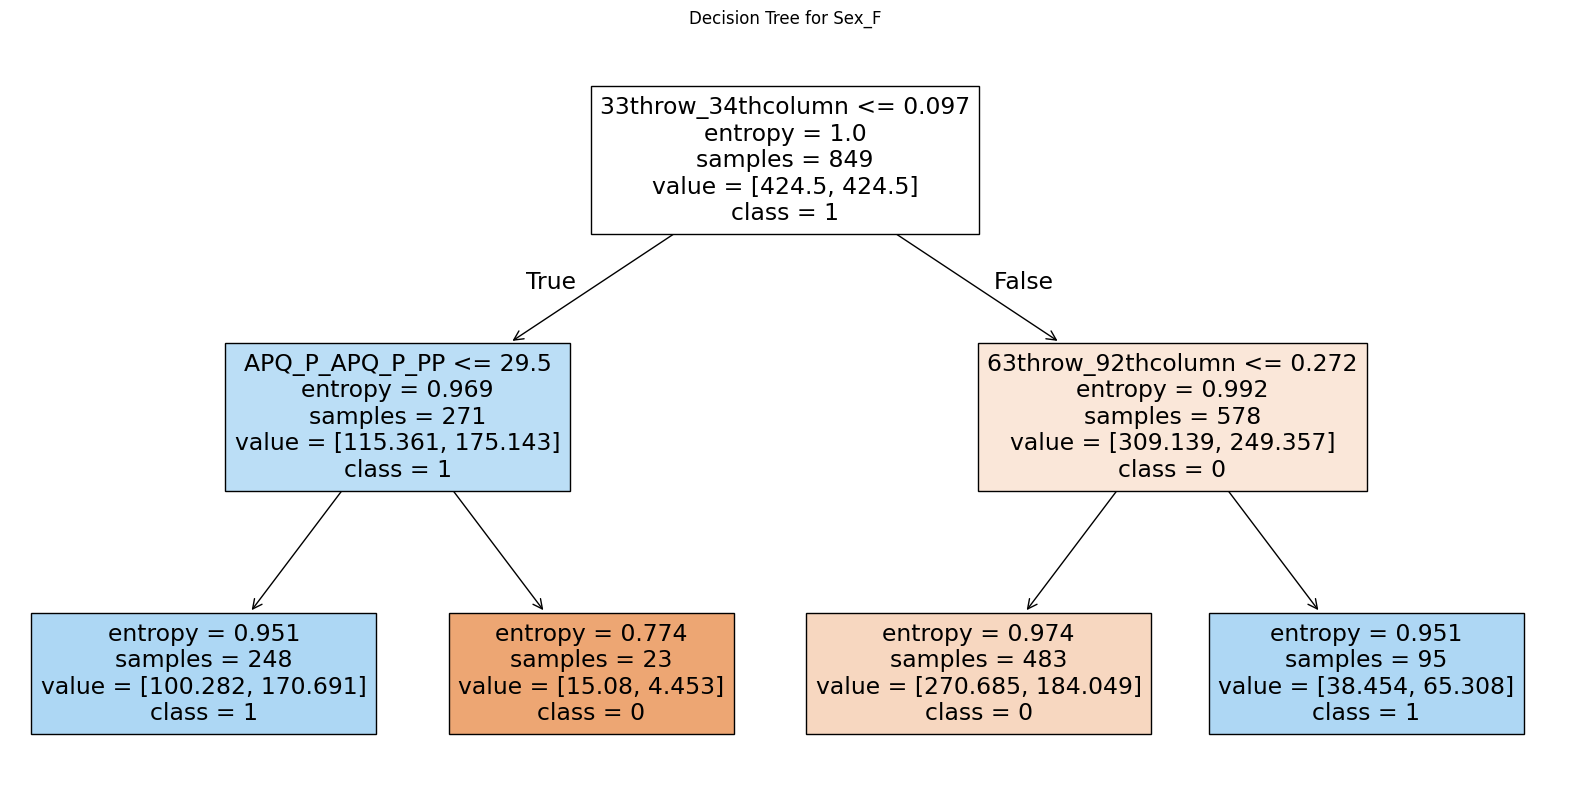

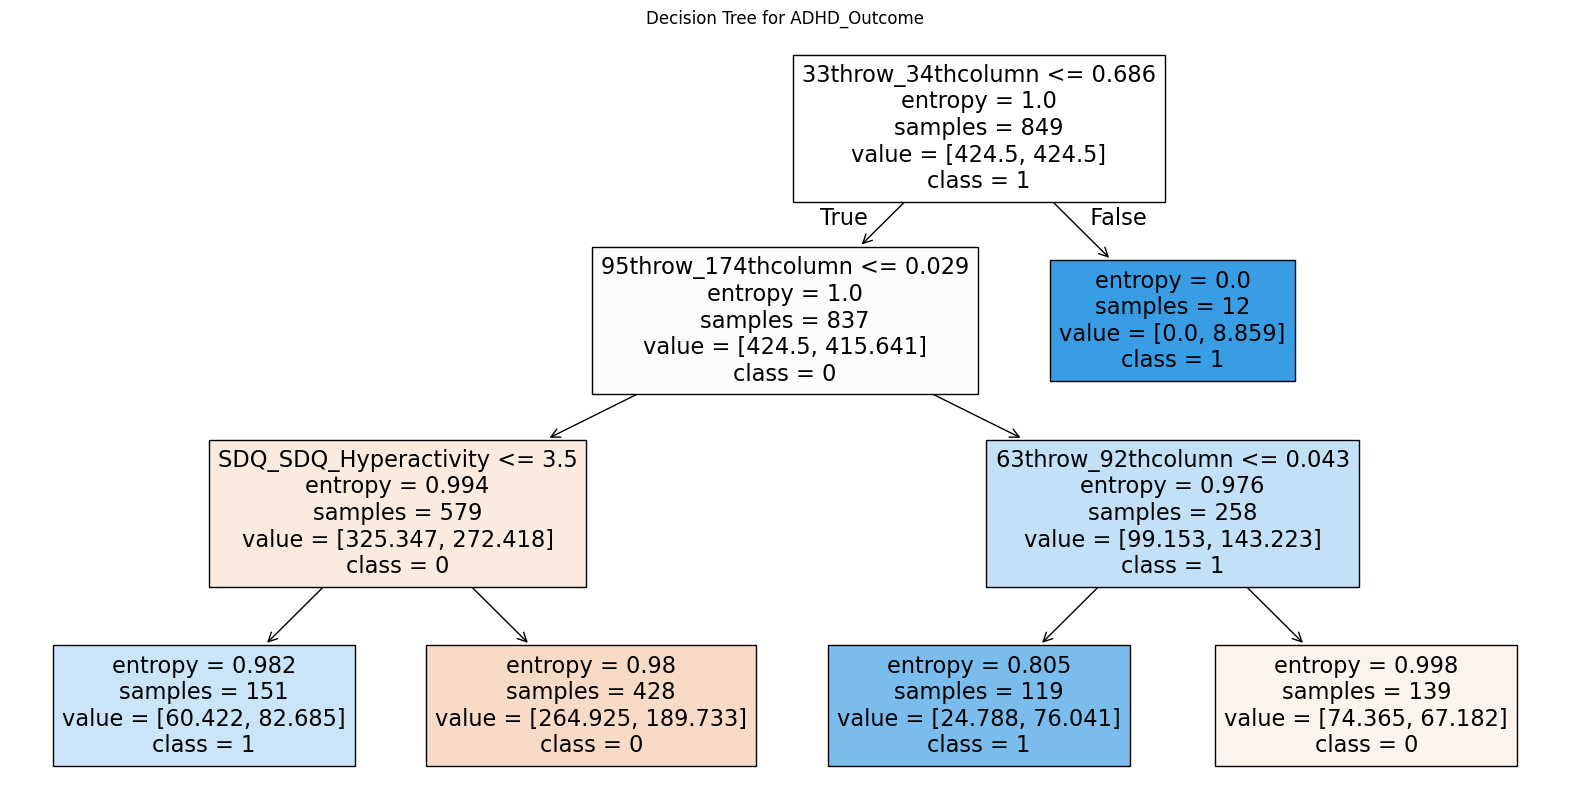

In [ ]:
# prompt: I want to plot the two trees of theat past two models

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'models' dictionary holds the trained DecisionTreeClassifier models for each label
# Example: models['Sex_F'], models['ADHD_Outcome']

# Plot the tree for 'Sex_F'
plt.figure(figsize=(20,10))
plot_tree(models['Sex_F'], filled=True, feature_names=X_train_3.columns, class_names=['0', '1']) # Assuming binary classification
plt.title("Decision Tree for Sex_F")
plt.show()


# Plot the tree for 'ADHD_Outcome'
plt.figure(figsize=(20,10))
plot_tree(models['ADHD_Outcome'], filled=True, feature_names=X_train_3.columns, class_names=['0', '1'])  # Assuming binary classification
plt.title("Decision Tree for ADHD_Outcome")
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_3,t1_train, test_size=0.3, random_state=101)
from sklearn.ensemble import RandomForestClassifier

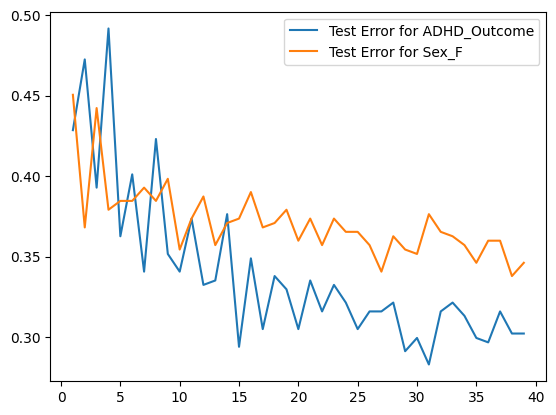

In [ ]:
# prompt: from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# from sklearn.ensemble import RandomForestClassifier
# test_error = []
# for n in range(1,40):
#     # Use n random trees
#     model = RandomForestClassifier(n_estimators=n,max_features='auto')
#     model.fit(X_train,y_train)
#     test_preds = model.predict(X_test)
#     test_error.append(1-accuracy_score(test_preds,y_test)) plt.plot(range(1,40),test_error,label='Test Error')
# plt.legend()
# i want to apply same but for that model, it contain two labels so i want it for each label

import matplotlib.pyplot as plt
test_error_per_label = []
for n in range(1, 40):
    model = RandomForestClassifier(n_estimators=n, max_features='sqrt')
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)

    error_per_label = []
    for i, col in enumerate(y_test.columns):
        error_per_label.append(1 - accuracy_score(y_test.iloc[:,i], test_preds[:, i]))
    test_error_per_label.append(error_per_label)

#Plot for each label
for i, col in enumerate(y_test.columns):
    plt.plot(range(1,40), [errors[i] for errors in test_error_per_label], label=f'Test Error for {col}')
plt.legend()
plt.show()


In [ ]:
# prompt: model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
# with lines like that:i want to make two random forest models, one for the first label(ADHD) and make for 11 tress and sex label want to make its model for 4 trees in randomforest

# Assuming X_train_3 and t1_train are defined as in your original code.

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_3, t1_train, test_size=0.3, random_state=101)

# ADHD model (11 trees)
adhd_model = RandomForestClassifier(n_estimators=15, max_features='sqrt', random_state=101)
adhd_model.fit(X_train, y_train['ADHD_Outcome'])

# Sex model (4 trees)
sex_model = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=101)
sex_model.fit(X_train, y_train['Sex_F'])

# Now you have two trained models: adhd_model and sex_model


RandomForestClassifier(n_estimators=10, random_state=101)

In [ ]:
def report1_model(model, target_label): # Add target_label as input
    model_preds = model.predict(X_test)
    print(f"Classification Report for label {target_label}:")
    print(classification_report(y_test[target_label], model_preds)) # Select the specific label from y_test
    print('\n')
    #plt.figure(figsize=(12,8),dpi=150)
    #plot_tree(model,filled=True,feature_names=X_train_3.columns); # This line might need adjustment for RandomForest


In [ ]:
 report1_model(adhd_model,"ADHD_Outcome")

Classification Report for label ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.40      0.16      0.23       108
           1       0.72      0.90      0.80       256

    accuracy                           0.68       364
   macro avg       0.56      0.53      0.51       364
weighted avg       0.62      0.68      0.63       364





In [ ]:
 report1_model(sex_model,"Sex_F")

Classification Report for label Sex_F:
              precision    recall  f1-score   support

           0       0.63      0.86      0.73       234
           1       0.28      0.10      0.15       130

    accuracy                           0.59       364
   macro avg       0.46      0.48      0.44       364
weighted avg       0.51      0.59      0.52       364





In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_train_3, t1_train, test_size=0.3, random_state=101)

# Compute sample weights for each label
adhd_weights = compute_sample_weight(class_weight='balanced', y=y_train['ADHD_Outcome'])
sex_weights = compute_sample_weight(class_weight='balanced', y=y_train['Sex_F'])

# ADHD model (11 trees)
adhd_model = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=101)
adhd_model.fit(X_train, y_train['ADHD_Outcome'], sample_weight=adhd_weights)

# Sex model (4 trees)
sex_model = RandomForestClassifier(n_estimators=15, max_features='sqrt', random_state=101)
sex_model.fit(X_train, y_train['Sex_F'], sample_weight=sex_weights)

# Predictions
adhd_pred = adhd_model.predict(X_test)
sex_pred = sex_model.predict(X_test)

# Evaluation
print("ADHD Accuracy:", accuracy_score(y_test['ADHD_Outcome'], adhd_pred))
print("Sex_F Accuracy:", accuracy_score(y_test['Sex_F'], sex_pred))


ADHD Accuracy: 0.6648351648351648
Sex_F Accuracy: 0.6071428571428571


In [ ]:
# prompt: want the classiffication report for the last two models made in randomforest

from sklearn.metrics import classification_report

# Assuming adhd_model and sex_model are the last two RandomForestClassifier models trained
# and X_test and y_test are defined as in your original code.

def report1_model(model, target_label):
    model_preds = model.predict(X_test)
    print(f"Classification Report for label {target_label}:")
    print(classification_report(y_test[target_label], model_preds))
    print('\n')

report1_model(adhd_model,"ADHD_Outcome")
report1_model(sex_model,"Sex_F")


Classification Report for label ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.40      0.26      0.31       108
           1       0.73      0.84      0.78       256

    accuracy                           0.66       364
   macro avg       0.56      0.55      0.55       364
weighted avg       0.63      0.66      0.64       364



Classification Report for label Sex_F:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74       234
           1       0.36      0.12      0.18       130

    accuracy                           0.61       364
   macro avg       0.50      0.50      0.46       364
weighted avg       0.54      0.61      0.54       364





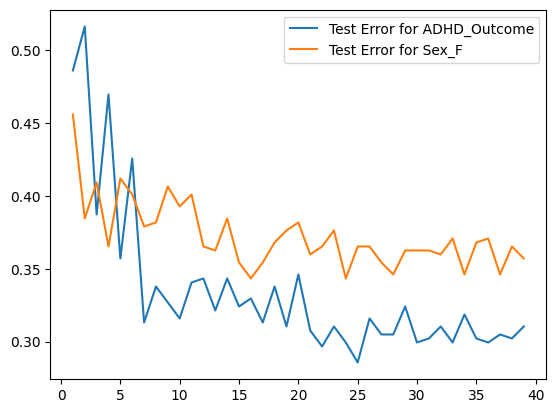

In [ ]:
import matplotlib.pyplot as plt
test_error_per_label = []
for n in range(1, 40):
    model = RandomForestClassifier(n_estimators=n, max_features='sqrt', class_weight='balanced')
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)

    error_per_label = []
    for i, col in enumerate(y_test.columns):
        error_per_label.append(1 - accuracy_score(y_test.iloc[:,i], test_preds[:, i]))
    test_error_per_label.append(error_per_label)

#Plot for each label
for i, col in enumerate(y_test.columns):
    plt.plot(range(1,40), [errors[i] for errors in test_error_per_label], label=f'Test Error for {col}')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_train_3, t1_train, test_size=0.3, random_state=101)

# Model 1: ADHD with 11 trees and class_weight='balanced'
adhd_model = RandomForestClassifier(n_estimators=7, max_features='sqrt', class_weight='balanced', random_state=101)
adhd_model.fit(X_train, y_train['ADHD_Outcome'])

# Model 2: Sex_F with 4 trees and class_weight='balanced'
sex_model = RandomForestClassifier(n_estimators=15, max_features='sqrt', class_weight='balanced', random_state=101)
sex_model.fit(X_train, y_train['Sex_F'])

# Evaluate ADHD model
y_pred_adhd = adhd_model.predict(X_test)
print("ADHD_Outcome Report:")
print(classification_report(y_test['ADHD_Outcome'], y_pred_adhd))

# Evaluate Sex model
from sklearn.metrics import classification_report

# Assuming adhd_model and sex_model are the last two RandomForestClassifier models trained
# and X_test and y_test are defined as in your original code.

def report1_model(model, target_label):
    model_preds = model.predict(X_test)
    print(f"Classification Report for label {target_label}:")
    print(classification_report(y_test[target_label], model_preds))
    print('\n')

report1_model(adhd_model,"ADHD_Outcome")
report1_model(sex_model,"Sex_F")


ADHD_Outcome Report:
              precision    recall  f1-score   support

           0       0.32      0.19      0.23       108
           1       0.71      0.83      0.76       256

    accuracy                           0.64       364
   macro avg       0.51      0.51      0.50       364
weighted avg       0.59      0.64      0.61       364

Classification Report for label ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.32      0.19      0.23       108
           1       0.71      0.83      0.76       256

    accuracy                           0.64       364
   macro avg       0.51      0.51      0.50       364
weighted avg       0.59      0.64      0.61       364



Classification Report for label Sex_F:
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       234
           1       0.40      0.13      0.20       130

    accuracy                           0.62       364
   macro avg       0

In [ ]:
# prompt: from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
# scaler = StandardScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)
# from sklearn.linear_model import LogisticRegression
# log_model = LogisticRegression()
# log_model.fit(scaled_X_train,y_train)
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
# y_pred = log_model.predict(scaled_X_test)
# accuracy_score(y_test,y_pred)
# confusion_matrix(y_test,y_pred)
# i want top apply that code here for that data , where i need two models one for each label and also output be for each label

# Assuming X_train_3 and t1_train are defined as in your original code.
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X_train_3, t1_train, test_size=0.3, random_state=101)

# Scale the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# ADHD model
log_model_adhd = LogisticRegression()
log_model_adhd.fit(scaled_X_train, y_train['ADHD_Outcome'])
y_pred_adhd = log_model_adhd.predict(scaled_X_test)

# Sex model
log_model_sex = LogisticRegression()
log_model_sex.fit(scaled_X_train, y_train['Sex_F'])
y_pred_sex = log_model_sex.predict(scaled_X_test)

# Evaluate the models
print("ADHD Model:")
print(classification_report(y_test['ADHD_Outcome'], y_pred_adhd))
print(confusion_matrix(y_test['ADHD_Outcome'], y_pred_adhd))

print("\nSex Model:")
print(classification_report(y_test['Sex_F'], y_pred_sex))
print(confusion_matrix(y_test['Sex_F'], y_pred_sex))


ADHD Model:
              precision    recall  f1-score   support

           0       0.25      0.04      0.06       108
           1       0.70      0.95      0.81       256

    accuracy                           0.68       364
   macro avg       0.48      0.50      0.44       364
weighted avg       0.57      0.68      0.59       364

[[  4 104]
 [ 12 244]]

Sex Model:
              precision    recall  f1-score   support

           0       0.65      0.94      0.77       234
           1       0.41      0.07      0.12       130

    accuracy                           0.63       364
   macro avg       0.53      0.51      0.44       364
weighted avg       0.56      0.63      0.54       364

[[221  13]
 [121   9]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_train_3, t1_train, test_size=0.3, random_state=101)

# Scale features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# ADHD model with class_weight
log_model_adhd = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)
log_model_adhd.fit(scaled_X_train, y_train['ADHD_Outcome'])
y_pred_adhd = log_model_adhd.predict(scaled_X_test)

# Sex model with class_weight
log_model_sex = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)
log_model_sex.fit(scaled_X_train, y_train['Sex_F'])
y_pred_sex = log_model_sex.predict(scaled_X_test)

# Evaluate ADHD model
print("ADHD Model:")
print(classification_report(y_test['ADHD_Outcome'], y_pred_adhd))
print(confusion_matrix(y_test['ADHD_Outcome'], y_pred_adhd))

# Evaluate Sex model
print("\nSex Model:")
print(classification_report(y_test['Sex_F'], y_pred_sex))
print(confusion_matrix(y_test['Sex_F'], y_pred_sex))


ADHD Model:
              precision    recall  f1-score   support

           0       0.39      0.57      0.47       108
           1       0.78      0.62      0.69       256

    accuracy                           0.61       364
   macro avg       0.58      0.60      0.58       364
weighted avg       0.66      0.61      0.63       364

[[ 62  46]
 [ 96 160]]

Sex Model:
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       234
           1       0.45      0.61      0.52       130

    accuracy                           0.60       364
   macro avg       0.59      0.60      0.59       364
weighted avg       0.63      0.60      0.60       364

[[138  96]
 [ 51  79]]


In [ ]:
# prompt: i want to apply neurak network on same way

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier # Import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, multilabel_confusion_matrix
from sklearn.preprocessing import StandardScaler

# ... (Your existing code for data loading and preprocessing) ...

# Assuming X_train_3 and t1_train are defined as in your original code.
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_3, t1_train, test_size=0.3, random_state=101)

# Scale the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# ADHD model using MLP Classifier
mlp_model_adhd = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=101) # Adjust parameters as needed
mlp_model_adhd.fit(scaled_X_train, y_train['ADHD_Outcome'])
y_pred_adhd = mlp_model_adhd.predict(scaled_X_test)

# Sex model using MLP Classifier
mlp_model_sex = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=101) # Adjust parameters as needed
mlp_model_sex.fit(scaled_X_train, y_train['Sex_F'])
y_pred_sex = mlp_model_sex.predict(scaled_X_test)

# Evaluate the models
print("ADHD Model (MLP):")
print(classification_report(y_test['ADHD_Outcome'], y_pred_adhd))
print(confusion_matrix(y_test['ADHD_Outcome'], y_pred_adhd))

print("\nSex Model (MLP):")
print(classification_report(y_test['Sex_F'], y_pred_sex))
print(confusion_matrix(y_test['Sex_F'], y_pred_sex))


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ADHD Model (MLP):
              precision    recall  f1-score   support

           0       0.37      0.31      0.34       108
           1       0.73      0.78      0.75       256

    accuracy                           0.64       364
   macro avg       0.55      0.55      0.55       364
weighted avg       0.62      0.64      0.63       364

[[ 34  74]
 [ 57 199]]

Sex Model (MLP):
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       234
           1       0.41      0.29      0.34       130

    accuracy                           0.60       364
   macro avg       0.54      0.53      0.53       364
weighted avg       0.57      0.60      0.58       364

[[180  54]
 [ 92  38]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
d_qtest = pd.read_excel('/kaggle/input/milestone2/TRAIN_NEW/TEST_QUANTITATIVE_METADATA.xlsx')

In [ ]:
d_cattest = pd.read_excel('/kaggle/input/milestone2/TRAIN_NEW/TEST_CATEGORICAL.xlsx')

In [ ]:
d_fcmtest=pd.read_csv('/kaggle/input/milestone2/TRAIN_NEW/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')

In [ ]:
# prompt: i want you to make the same pre processing and eliminationg null and merging them in same way i make before for the above three test files and the apply the clssification models of desisin tree and random forest with same parametrs of values of trees for each label and knn with same parametrs above and neural networkon them and then Evaluate each classification technique.there is no solutions that test files only be outputted

import pandas as pd
# Preprocessing for d_qtest
for col in d_qtest.columns:
    if pd.api.types.is_numeric_dtype(d_qtest[col]):
        d_qtest[col].fillna(d_qtest[col].mean(), inplace=True)
d_qtest.ffill(inplace=True)

# Preprocessing for d_cattest
for col in d_cattest.columns:
    if d_cattest[col].dtype == 'object':
        d_cattest[col].fillna(d_cattest[col].mode()[0], inplace=True)
    elif pd.api.types.is_numeric_dtype(d_cattest[col]):
      d_cattest[col].fillna(d_cattest[col].mean(), inplace=True)
d_cattest.ffill(inplace=True)


for col in d_cattest.select_dtypes(include=['int']).columns:
    d_cattest[col] = d_cattest[col].astype('category')
columns_to_encode_test = d_cattest.columns[1:].tolist()
d_cat_encoded_test = pd.get_dummies(d_cattest[columns_to_encode_test], drop_first=True)
d_cat_encoded_test = d_cat_encoded_test.applymap(lambda x: 1 if x is True else (0 if x is False else x))
d_cat_final_test = pd.concat([d_cattest.drop(columns=columns_to_encode_test), d_cat_encoded_test], axis=1)


# Preprocessing for d_fcmtest
for col in d_fcmtest.columns:
    if pd.api.types.is_numeric_dtype(d_fcmtest[col]):
        d_fcmtest[col].fillna(d_fcmtest[col].mean(), inplace=True)
d_fcmtest.ffill(inplace=True)

# Merge the test datasets
d_cat_fcm_test = pd.merge(d_fcmtest, d_cat_final_test, on='participant_id', how='outer')
d_test = pd.merge(d_cat_fcm_test, d_qtest, on='participant_id', how='outer')

d_test.fillna(d_test.select_dtypes(include=['number']).mean(), inplace=True)

# Feature selection (use the common features from training)
X_test_final = d_test[common_features]


# ... (rest of the code for classification models)

# Decision Tree
dt_classifier.fit(X_train_3,t1_train) #fit on the whole training dataset
y_pred_dt_test= dt_classifier.predict(X_test_final)
print("Decision Tree Classifier (Test Data):")
#print(classification_report(y_test, y_pred_dt_test)) #You need a solution file for the test data for evaluation

# Random Forest
adhd_model.fit(X_train_3, t1_train['ADHD_Outcome'])
y_pred_rf_adhd = adhd_model.predict(X_test_final)
print("Random Forest ADHD (Test Data):")
#print(classification_report(y_test['ADHD_Outcome'], y_pred_rf_adhd)) #You need a solution file for the test data for evaluation

sex_model.fit(X_train_3, t1_train['Sex_F'])
y_pred_rf_sex = sex_model.predict(X_test_final)
print("Random Forest Sex (Test Data):")
#print(classification_report(y_test['Sex_F'], y_pred_rf_sex)) #You need a solution file for the test data for evaluation

#KNN
grid_search.fit(X_train_3,t1_train) #fit on the whole training data
y_pred_knn_test = grid_search.predict(X_test_final)
print("KNN (Test Data):")
#print(classification_report(y_test, y_pred_knn_test)) #You need a solution file for the test data for evaluation

# Neural Network
mlp_model_adhd.fit(scaled_X_train, y_train['ADHD_Outcome'])
y_pred_mlp_adhd = mlp_model_adhd.predict(scaler.transform(X_test_final))
print("MLP ADHD (Test Data):")
#print(classification_report(y_test['ADHD_Outcome'], y_pred_mlp_adhd)) #You need a solution file for the test data for evaluation


mlp_model_sex.fit(scaled_X_train, y_train['Sex_F'])
y_pred_mlp_sex = mlp_model_sex.predict(scaler.transform(X_test_final))
print("MLP Sex (Test Data):")
#print(classification_report(y_test['Sex_F'], y_pred_mlp_sex)) #You need a solution file for the test data for evaluation


<ipython-input-69-84338e99a091>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d_qtest[col].fillna(d_qtest[col].mean(), inplace=True)
<ipython-input-69-84338e99a091>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

NameError: name 'dt_classifier' is not defined